In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_exam.csv')

In [3]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [4]:
df.head()

X          Y  label
0  34.623660  78.024693      0
1  30.286711  43.894998      0
2  35.847409  72.902198      0
3  60.182599  86.308552      1
4  79.032736  75.344376      1

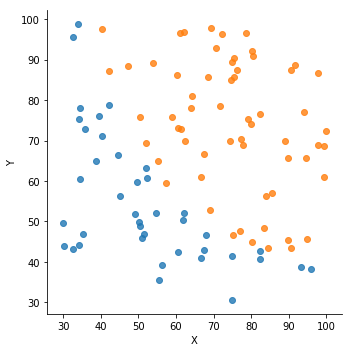

In [34]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()

In [5]:
#Adding polynomial features
X['x^2'] = X['X'] ** 2

In [6]:
X['Y^2'] = X['Y'] ** 2
X['X_Y'] = X['X'] * X['Y']

In [7]:
X.head(

X          Y          x^2          Y^2          X_Y
0  34.623660  78.024693  1198.797805  6087.852690  2701.500406
1  30.286711  43.894998   917.284849  1926.770807  1329.435094
2  35.847409  72.902198  1285.036716  5314.730478  2613.354893
3  60.182599  86.308552  3621.945269  7449.166166  5194.273015
4  79.032736  75.344376  6246.173368  5676.775061  5954.672216

In [8]:
X = (X - np.mean(X))/np.std(X)

In [9]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [10]:
X.head()

bias         X         Y       x^2       Y^2       X_Y
0   1.0 -1.602248  0.638341 -1.375110  0.546497 -0.926245
1   1.0 -1.826256 -1.207541 -1.486182 -1.124797 -1.702527
2   1.0 -1.539040  0.361294 -1.341084  0.235973 -0.976116
3   1.0 -0.282101  1.086368 -0.419043  1.093267  0.484106
4   1.0  0.691528  0.493378  0.616362  0.381388  0.914321

In [11]:
#splitting into training and test set

In [12]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [13]:
w = np.random.normal(0,1,X.shape[1])

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [15]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [16]:
lemda = 0.001

In [17]:
def gradient_descent(w,alpha,num_iters,lemda):
    theta = []
    cost = []
    lembda_mat = lemda * np.identity(X.shape[1])
    lembda_mat[0][0] = 0
    for i in range(num_iters):
        pred = np.dot(X_train,w)
        h = sigmoid(pred)
        error = loss(Y_train,h) + lemda * np.dot(w.T, w)
        grad = (np.dot(X_train.T,h- Y_train) + np.matmul(lembda_mat,w))/Y_train.size
        theta.append(w)
        cost.append(error)
        w = w - alpha * grad
    return cost,theta

In [62]:
cost, theta = gradient_descent(w,0.3,500,lemda)

Text(0,0.5,'value of cost')

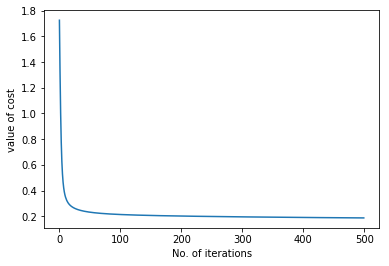

In [19]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [64]:
theta = theta[-1]

In [65]:
theta

array([ 1.87100892,  2.11053394,  2.19031499, -0.27012599, -0.36642921,
        2.75490161])

In [21]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [22]:
a = pred(X_test)

In [23]:
a = a >= 0.5
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [24]:
Y_test = Y_test.reset_index(drop=True)

In [25]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [26]:
predicted_data

label  Actual_label
0       0             0
1       1             1
2       0             0
3       1             1
4       0             1
5       1             1
6       1             1
7       1             1
8       0             0
9       1             1
10      0             0
11      1             1
12      1             1
13      1             1
14      0             0
15      1             1
16      1             1
17      1             1
18      1             1
19      1             1
20      0             0
21      0             0
22      0             0
23      1             1
24      0             0
25      0             0
26      0             0
27      0             1
28      1             1
29      0             0

In [27]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [28]:
accuracy

0.9333333333333333

In [44]:
X.insert(loc = 0,column = 'label',value=Y)

ValueError: cannot insert label, already exists

In [53]:
plot_data = pd.concat([X,Y],axis=1)

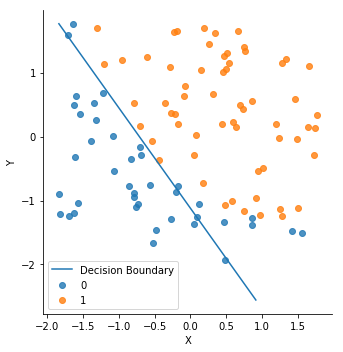

In [60]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['X'])
x_1 = max(plot_data['X'])

plt.plot([x_0,1 * -(theta[0] + theta[1]* x_0)/theta[2]], [ x_1,1 * -(theta[0] + theta[1]* x_1)/theta[2] ],label = "Decision Boundary")
# Move the legend to an empty part of the plot
plt.legend(loc='best')


In [57]:
plot_data.drop(labels=['x^2','Y^2','X_Y'],axis = 1)

bias         X         Y  label
0    1.0 -1.602248  0.638341      0
1    1.0 -1.826256 -1.207541      0
2    1.0 -1.539040  0.361294      0
3    1.0 -0.282101  1.086368      1
4    1.0  0.691528  0.493378      1
5    1.0 -1.061997 -0.535739      0
6    1.0 -0.234372  1.638184      1
7    1.0  0.484511 -1.063730      1
8    1.0  0.539987  1.146511      1
9    1.0  0.970448 -1.227099      1
10   1.0  1.560755 -1.514185      0
11   1.0  0.483939 -1.926416      0
12   1.0  0.860650  0.554904      1
13   1.0  0.192158  1.703478      1
14   1.0 -1.348399  0.530828      0
15   1.0 -0.602934  1.243148      1
16   1.0  0.176950 -0.729140      1
17   1.0  0.118931 -1.056993      0
18   1.0  0.259146  1.444330      1
19   1.0  0.585439 -1.008459      1
20   1.0  0.089240 -1.264685      0
21   1.0  1.241304 -0.022858      1
22   1.0 -0.780421 -0.939239      0
23   1.0 -1.623507 -1.190530      0
24   1.0  0.634266  0.148752      1
25   1.0 -0.174232  0.201868      1
26   1.0  0.751312 -1.157425      1
27   1.0  1.418861 -1.483065      0
28   1.0 -0.197001 -0.863505      0
29   1.0 -1.387268 -0.066325      0
..   ...       ...       ...    ...
70   1.0 -1.700427 -1.239334      0
71   1.0 -0.082898  0.638719      1
72   1.0  0.346177  1.622833      1
73   1.0 -0.267882  0.371722      1
74   1.0 -0.351399  0.521181      1
75   1.0  1.765618  0.332470      1
76   1.0 -0.949347  1.203586      1
77   1.0 -0.784379  0.518553      1
78   1.0 -0.268003 -1.282534      0
79   1.0  0.856498 -1.271097      0
80   1.0  1.201901  0.193719      1
81   1.0  1.507706 -1.110227      1
82   1.0  0.086515  0.019868      1
83   1.0 -0.434156 -0.362782      1
84   1.0  0.760432  1.337947      1
85   1.0  0.145875  1.047739      1
86   1.0 -1.217355  0.682695      0
87   1.0  0.507907  1.308979      1
88   1.0  0.671007  1.645540      1
89   1.0 -0.686766 -0.294895      0
90   1.0  1.469476  0.591526      1
91   1.0  1.281167  1.151282      1
92   1.0 -0.524884 -1.657755      0
93   1.0  0.457030  1.007220      1
94   1.0  1.250035 -1.128401      1
95   1.0  0.921707 -0.964957      1
96   1.0 -1.207735  1.129382      1
97   1.0  1.739129  0.138100      1
98   1.0 -0.532226 -0.069772      1
99   1.0  0.471658  1.260588      1

[100 rows x 4 columns]

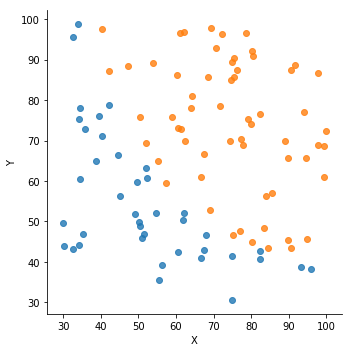

In [40]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()